<a href="https://colab.research.google.com/github/iemio/torch/blob/main/notebook_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

# Check if CUDA is available
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

torch.set_default_device(device)
print(f"Using device = {torch.get_default_device()}")

Using device = cuda:0


In [ ]:
# Step 1: Download the file and save it as utils.py
!wget -O utils.py "https://raw.githubusercontent.com/iemio/DL_helpers/refs/heads/main/basic_rnn_helpers.py"

--2025-01-27 14:10:24--  https://raw.githubusercontent.com/iemio/DL_helpers/refs/heads/main/basic_rnn_helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3009 (2.9K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   2.94K  --.-KB/s    in 0s      

2025-01-27 14:10:25 (34.7 MB/s) - ‘utils.py’ saved [3009/3009]



In [ ]:
!cat utils.py


# data: https://download.pytorch.org/tutorial/data.zip
import io
import os
import unicodedata
import string
import glob

import torch
import random

# alphabet small + capital letters + " .,;'"
ALL_LETTERS = string.ascii_letters + " .,;'"
N_LETTERS = len(ALL_LETTERS)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in ALL_LETTERS
    )

def load_data():
    # Build the category_lines dictionary, a list of names per language
    category_lines = {}
    all_categories = []
    
    def find_files(path):
        return glob.glob(path)
    
    # Read a file and split into lines
    def read_lines(filename):
        lines = io.open(filename, encoding='utf-8').read().strip().split('\n')
        return [unicode_to_ascii(line) for line in lines]
    
    for filename in find_files('data/names/*.txt

In [ ]:
import os
import zipfile

# Step 1: Download the file
!wget -O data.zip "https://download.pytorch.org/tutorial/data.zip"

# Step 2: Extract the ZIP file
with zipfile.ZipFile("data.zip", "r") as zip_ref:
    zip_ref.extractall()  # Extracts into a folder if folder is given otherwise in root directory of collab

# Step 3: Check the extracted files
print("Extracted files and directories:")
for root, dirs, files in os.walk("data"):
    for file in files:
        print(os.path.join(root, file))


--2025-01-27 14:26:13--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 3.165.102.113, 3.165.102.31, 3.165.102.36, ...
Connecting to download.pytorch.org (download.pytorch.org)|3.165.102.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.02s   

2025-01-27 14:26:13 (110 MB/s) - ‘data.zip’ saved [2882130/2882130]

Extracted files and directories:
data/eng-fra.txt
data/names/French.txt
data/names/Polish.txt
data/names/Arabic.txt
data/names/Greek.txt
data/names/English.txt
data/names/German.txt
data/names/Japanese.txt
data/names/Vietnamese.txt
data/names/Chinese.txt
data/names/Portuguese.txt
data/names/Italian.txt
data/names/Spanish.txt
data/names/Dutch.txt
data/names/Irish.txt
data/names/Scottish.txt
data/names/Russian.txt
data/names/Czech.txt
data/names/Korean.txt


In [ ]:
!rm -rf data

In [ ]:
# Remove the data.zip file
!rm -f data.zip

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [ ]:
class RNN(nn.Module):
    # implement RNN from scratch rather than using nn.RNN
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)

        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
category_lines, all_categories = load_data()
n_categories = len(all_categories)

In [ ]:
n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

In [ ]:
# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()

In [ ]:
output, next_hidden = rnn(input_tensor, hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [ ]:
# whole sequence/name
input_tensor = line_to_tensor('Albert')
hidden_tensor = rnn.init_hidden()

In [ ]:
output, next_hidden = rnn(input_tensor[0], hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [ ]:
#
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

In [ ]:
print(category_from_output(output))

Chinese


In [ ]:
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

5000 5.0 2.4661 Ferro / Portuguese CORRECT
10000 10.0 1.0401 Alfimov / Russian CORRECT
15000 15.0 1.3977 Sebastino / Italian CORRECT
20000 20.0 0.9307 Hui / Chinese CORRECT
25000 25.0 2.2610 Sweeting / German WRONG (English)
30000 30.0 2.7350 Laterza / Portuguese WRONG (Italian)
35000 35.0 1.7874 Rompu / Dutch CORRECT
40000 40.0 2.6740 Leedham / Vietnamese WRONG (English)
45000 45.0 0.3230 Araujo / Portuguese CORRECT
50000 50.0 1.8310 Goulding / Irish WRONG (English)
55000 55.00000000000001 0.8304 Song / Chinese CORRECT
60000 60.0 0.1470 Son / Korean CORRECT
65000 65.0 0.5558 Palmeiro / Portuguese CORRECT
70000 70.0 2.0492 Tahan / Vietnamese WRONG (Arabic)
75000 75.0 2.4548 Novotny / English WRONG (Czech)
80000 80.0 0.7751 Hunter / Scottish CORRECT
85000 85.0 1.3258 Sze  / Chinese CORRECT
90000 90.0 3.0541 Alftan / English WRONG (Russian)
95000 95.0 2.7898 Samaha / Japanese WRONG (Arabic)
100000 100.0 0.0076 Chrysanthopoulos / Greek CORRECT


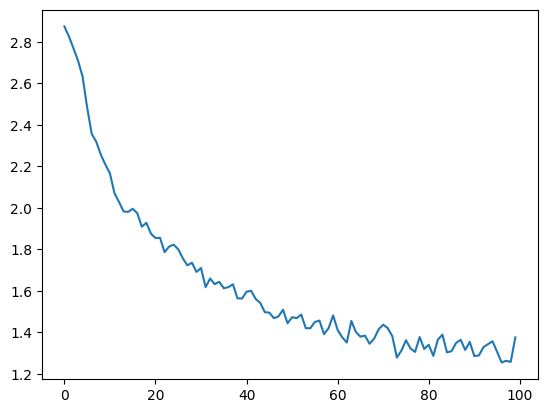

In [ ]:
def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item()

current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)

    output, loss = train(line_tensor, category_tensor)
    current_loss += loss

    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0

    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")


plt.figure()
plt.plot(all_losses)
plt.show()

In [ ]:
def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)

        hidden = rnn.init_hidden()

        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)

        guess = category_from_output(output)
        print(guess)


while True:
    sentence = input("Input:")
    if sentence == "quit":
        break

    predict(sentence)

Input:keshav

> keshav
Russian
Input:alftan

> alftan
English
Input:goulding

> goulding
Irish
Input:exit

> exit
French
Input:quit
